<a href="https://colab.research.google.com/github/yuesha-yc/bci/blob/main/Intro_to_Signal_Processing_(Workshop_Copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Signal Processing
Last time, we learned a few more topics in Python and started working with Numpy and Matplotlib, two libraries that are integral to signal processing using Python. Today, we will be learning about some basic signal processing.


## Fourier Analysis

Fourier analysis is the study of how functions can be represented or approximated by a weighted sum of sines and cosines (Fourier series).

The following example showcases the effects of adding two sine waves together. What do you notice about the resulting wave (ie periodicity, amplitude, etc)?

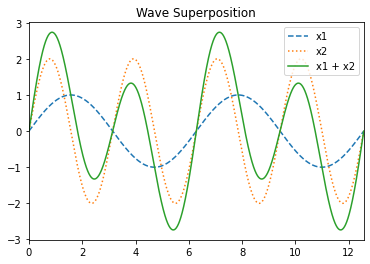

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 4*np.pi, 10000)

x1 = np.sin(t)
x2 = 2*np.sin(2*t)

plt.plot(t, x1, linestyle='dashed')
plt.plot(t, x2, linestyle='dotted')
plt.plot(t, x1+x2)

plt.legend(['x1', 'x2', 'x1 + x2'])
plt.xlim([0, 4*np.pi])
plt.title('Wave Superposition')

plt.show()

This example demonstrates that we are not limited to creating sinusoid-like functions; with enough frequency components, this function approximates a square wave.


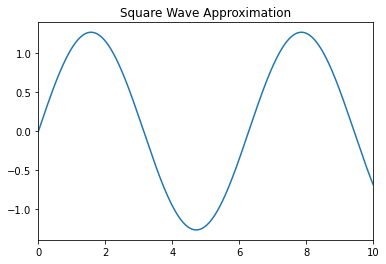

In [5]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 10000)
approximation = np.zeros(np.shape(t))

for n in range(1):
  k = n*2 + 1
  approximation += 4/(k*np.pi)*np.sin(k*t)

plt.plot(t, approximation)
plt.title('Square Wave Approximation')
plt.xlim([0, 10])

plt.show()

## Discrete Fourier Transform

The DFT of a signal can reveal a few useful bits of information. For example, it shows us the frequencies that make up the original signal, which is important for an application like EEG analysis. 

### A Simple Example


The following plot shows a very simple example of the FFT in use.


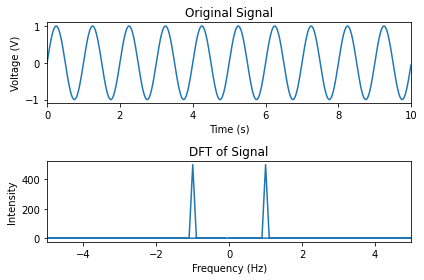

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100 # Sampling rate
t = np.linspace(0, 10, 10*fs, endpoint=False)
sig = np.sin(2*np.pi*t)

dft = np.fft.fft(sig)
freq = np.fft.fftfreq(sig.size, 1/fs)

plt.subplot(2,1,1)
plt.plot(t, sig)
plt.xlim([0, 10])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Original Signal")

plt.subplot(2,1,2)
plt.plot(freq, np.abs(dft))
plt.xlim([-5, 5])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("DFT of Signal")

plt.tight_layout()
plt.show()

There are a few points of interest in the above plot:

1) It is symmetric about the y-axis. This has to do with the fact that we are working with a real signal as opposed to a complex signal. This means that we're really only interested in half of the graph. If you take a look at ```freq```, you can also see that the way that the frequencies are arranged allows you to easily take only the half with the positive frequencies.

2) Frequencies in the signal range from $-\frac{fs}{2}$ to $\frac{fs}{2}$, which aligns with the Nyquist-Shannon Sampling Theorem.

3) When we look at the frequency components of an EEG, we are typically only concerned with how much of each type of wave there is, so we take the magnitude of the DFT. 

4) There are only two spikes in the plot, corresponding to $\pm1\:Hz$. This is what we expect given the original signal is a sinusoid with the same frequency.

### A More Complex Example

Now, let's try plotting the DFT of a more complex signal:

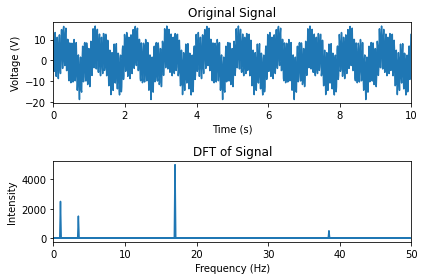

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100
t = np.linspace(0, 10, 10*fs, endpoint=False)
sig = 5*np.sin(2*np.pi*t) - 3*np.sin(7*np.pi*t - 2) \
      + 10*np.sin(34*np.pi*t - 4) - np.sin(77*np.pi*t + 7)

dft = np.fft.fft(sig)
freq = np.fft.fftfreq(sig.size, 1/fs)

plt.subplot(2,1,1)
plt.plot(t, sig)
plt.xlim([0, 10])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Original Signal")

plt.subplot(2,1,2)
plt.plot(freq, np.abs(dft))
plt.xlim([0, fs/2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("DFT of Signal")

plt.tight_layout()
plt.show()

This example gives us a much clearer picture of what exactly the magnitude of the DFT means. Note the four spikes at $1\:Hz$, $3.5\:Hz$, $17\:Hz$, and $38.5\:Hz$. The graph also seems to suggest that the heights of the spikes are related to the weight each sinusoid had from its coefficient. If we print the magnitudes, we can see a much clearer picture of what is happening.

In [8]:
"""
We can make use of enumerate() to find the indices of the 
desired frequencies, then obtain the magnitudes corresponding
to those indices.
"""
desired_freqs = [1, 3.5, 17, 38.5]
mags = []

for idx, val in enumerate(freq):
  if val in desired_freqs:
    mags.append(np.abs(dft[idx]))

print("The magnitudes are", mags)

The magnitudes are [2499.999999999997, 1500.0000000000057, 5000.000000000003, 500.00000000000296]


The magnitudes are directly proportional to the coefficients of the sinusoids! This means that the magnitude of the DFT shows us not only the different frequency components of a signal, but also how much each frequency component contributes to the signal (its weight). This is a powerful tool for an application like EEG analysis, where we want to see which waves are dominant in a certain window of time.


### DFT of a Square Wave

Try this example to see how the Fourier series and the Fourier transform are related.

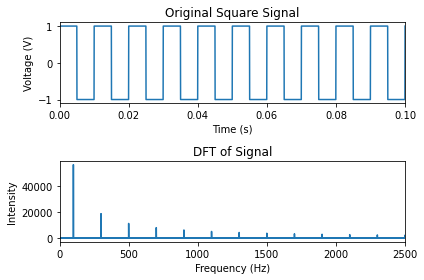

In [16]:
"""
Plot the FFT of the square wave shown below. 

How do the spikes relate to the Fourier series approximation that we saw above?
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal # Signal generator

fs = 44100
t = np.arange(0, 2, 1/fs)
square = signal.square(2*np.pi*100*t) # 100 Hz square wave

"""
Your code here
"""
dft = np.fft.fft(square)
freq = np.fft.fftfreq(square.size, 1/fs)

plt.subplot(2,1,1)
plt.plot(t, square)
plt.xlim([0, 0.1])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Original Square Signal")

plt.subplot(2,1,2)
plt.plot(freq, np.abs(dft))
plt.xlim([0, 2500])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("DFT of Signal")

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Application of the DFT: Chord Analysis

Sound is defined as a longitudinal wave travelling through a medium. It is typically modeled as a sinusoidal function of pressure fluctuation. The amplitude of the wave contributes to how loud a noise is perceived to be, while the frequency of the wave serves as the primary factor in determining the pitch of a sound. 

When multiple pitches are played at the same time (chords), we are hearing a superposition of all of the different frequencies corresponding to the different notes, creating a signal that is much more complex than a simple sinusoid. Luckily, we have just learned a technique to break a signal into its frequency components, which lets us break down a chord.

Unfortunately, sound is much more complicated than that. Each instrument produces a different sound, even when the same note is played. This difference in tone, known as timbre, is a result of harmonics, which are frequencies that are multiples of the main, or fundamental, frequency. There are also many other factors that contribute to the sound wave, making chord analysis a much more difficult problem.

Regardless, it is still helpful to visualize the frequency components of a signal, especially when it involves an easily perceptible signal like sound. We have included 4 wav files for you to plot the frequency spectrum of. Try listening to each one and see if there is anything that you can see in the frequency spectrums that correlate to those observations. For example, are there any similar sounding chords that have similar FFT plots? 

Hint: You will need to mount your Drive and then read from the wav files using [wavfile.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) from the scipy.io library.





Mounted at /content/drive/


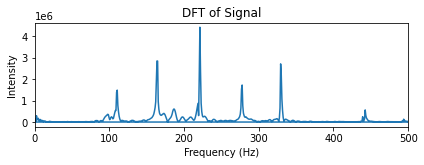

In [28]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

dir = "/content/drive/MyDrive/Workshop_5_Data/Chords/"

"""
Your code here
"""
fs, data = wavfile.read(dir + "chord_1.wav")
t = np.arange(0, 2, 1/fs)

dft = np.fft.fft(data)
freq = np.fft.fftfreq(data.size, 1/fs)

# plt.subplot(2,1,1)
# plt.plot(t, data)
# plt.xlim([0, 0.1])
# plt.xlabel("Time (s)")
# plt.ylabel("Voltage (V)")
# plt.title("Original Signal")

plt.subplot(2,1,2)
plt.plot(freq, np.abs(dft))
plt.xlim([0, 500])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("DFT of Signal")

plt.tight_layout()
plt.show()


## Spectrograms
While the Fourier transform is great for visualizing the frequency of a signal, we can see from the plots of the chords above that it tells us nothing about **when** certain frequencies occur in a signal. EEG analysis typically involves studying how the brain reacts to certain stimuli, so we are interested in how the frequency components of an EEG signal change over time. 

We can use spectrograms to visualize frequency changes over time and combine this data with our Fourier transforms to gain much more insight into what a signal actually means.


### A Simple Example

Let's see a very basic example that shows how to use ```plt.specgram()```.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 10000
t = np.arange(0, 10, 1/fs)
data = np.sin(2*np.pi*1000*t) + np.cos(2*np.pi*2500*t) 

plt.specgram(data, Fs=fs, NFFT=1024)
plt.colorbar()
plt.title("Spectrogram of a sinusoid (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()

Note the two yellow stripes that correspond to the frequencies that make up our signals. From the colorbar, we can see that brighter colors correspond to more power, ie the frequencies at the yellow lines have the most (and in this case only) weight in the signal.

### A More Complex Example

Now, let's examine the spectrogram for a signal whose frequency components change over time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 10000
t1 = np.arange(0, 5, 1/fs)
t2 = np.arange(5, 10, 1/fs)
t = np.concatenate((t1, t2))

data_1 = np.sin(2*np.pi*4000*t1) + np.cos(2*np.pi*1800*t1)
data_2 = np.sin(2*np.pi*3500*t2) + np.sin(2*np.pi*800*t2)
data = np.concatenate((data_1, data_2))

plt.specgram(data, Fs=fs, NFFT=2048)
plt.colorbar()
plt.title("Spectrogram (dB)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()

Notice how the location of the yellow stripes changes when the frequency composition of the signal changes.

### Application of Spectrograms: Music Analysis

Just like how we can use the Fourier transform to gain some insight on what notes are being played in a chord, a spectrogram can be used to learn which notes are being played when (or at least know the relative pitches). 

Try creating a spectrogram of ```unknown_sound.wav```. Does the spectrogram match what you hear in the audio file? 

Hint: You'll need to zoom in onto the lower frequencies using ```plt.ylim()``` if you want a better look at how the frequencies are changing.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

filename = "path_to_sound_file"

"""
Your code here
"""
